In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
df = pd.read_csv('/content/anime.csv')
user = pd.read_csv('/content/rating.csv')

In [3]:
#df details
print(df.shape)
print(user.shape)

(12294, 7)
(7813737, 3)


Anime that got rated with a rating score higher than the average rating per user, is classified as a like.

In [4]:
#Mean rating per user
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id', 'rating'],axis=1, inplace=True)

In [5]:
MRPU.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [6]:
#dropping all the ratings that are less than mean rating
user = pd.merge(user,MRPU,on=['user_id','user_id'])
user = user.drop(user[user.rating < user.mean_rating].index)

In [7]:
user[user['user_id']== 5].head(10)

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
307,5,22,5,4.263383
310,5,45,7,4.263383
311,5,47,8,4.263383
312,5,57,7,4.263383
314,5,67,6,4.263383


In [8]:
#merge dfs
merge_df = pd.merge(df,user,on=['anime_id','anime_id'])
merge_df= merge_df[merge_df.user_id <= 20000]

In [9]:
merge_df.shape

(1131696, 10)

In [10]:
merge_df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298


In [11]:
user_anime = pd.crosstab(merge_df['user_id'], merge_df['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3 )
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [13]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415762
1,-1.773553,-0.272593,0.116388
2,0.218814,-1.232282,-0.985804
3,0.199435,-0.291005,0.681062
4,3.532125,-0.184796,-0.743311


In [24]:
to_cluster = pd.DataFrame(ps[[0,1,2]])

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(to_cluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(to_cluster, kmeans.labels_))

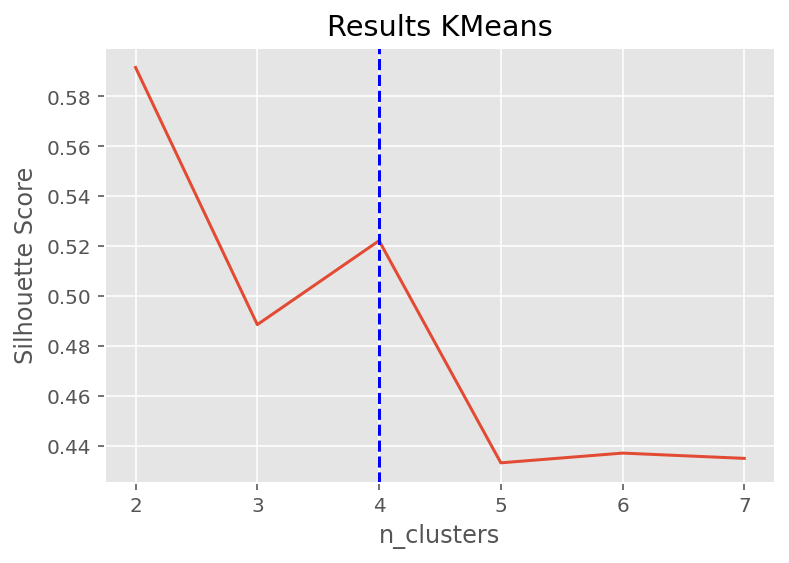

In [26]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [27]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(to_cluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(to_cluster)

print(centers)

[[-1.08874971 -0.04026583  0.06666436]
 [ 7.61700382 -0.64256847  0.83955701]
 [ 1.6784451   2.31533839 -0.02522547]
 [ 1.97875213 -1.12654221 -0.43514749]]


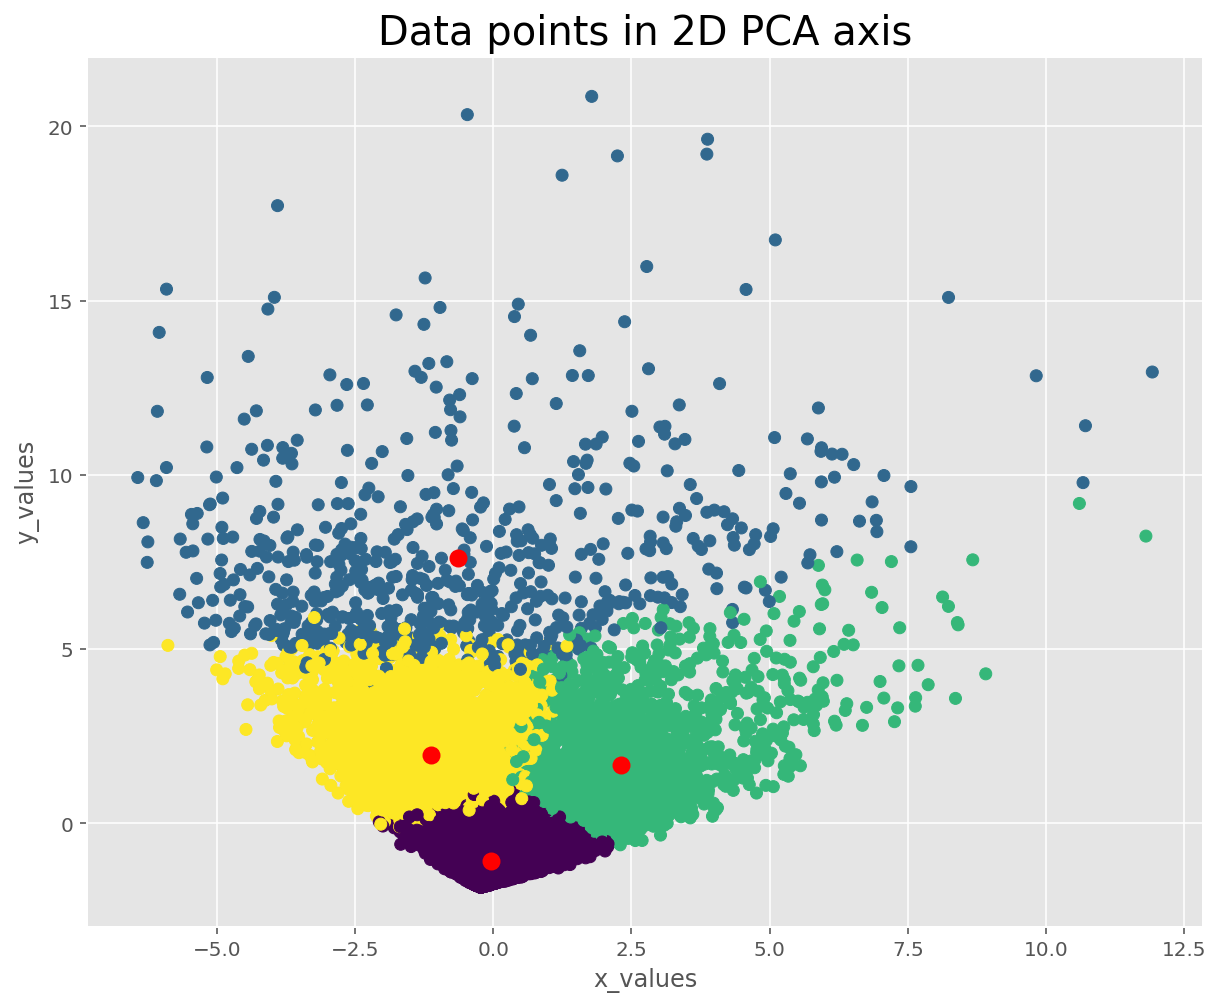

In [28]:
fig = plt.figure(figsize=(10,8))
plt.scatter(to_cluster[1],to_cluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [29]:
user_anime['cluster'] = c_preds

In [30]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [31]:
c0.sort_values(ascending=False)[0:10]

name
Death Note                            0.320642
Shingeki no Kyojin                    0.230444
Sword Art Online                      0.198824
Fullmetal Alchemist: Brotherhood      0.181616
Code Geass: Hangyaku no Lelouch       0.178820
Sen to Chihiro no Kamikakushi         0.159963
Angel Beats!                          0.157095
Fullmetal Alchemist                   0.155661
Code Geass: Hangyaku no Lelouch R2    0.153510
Naruto                                0.146125
dtype: float64

In [33]:
def createAnimeList(al):
    no_Ep = list()
    no_genres = list()
    no_members = list()
    no_Ratings= list()
    for x in df['name']:
        if x in al:
            no_Ep.append(df[df['name']==x].episodes.values.astype(int))
            no_members.append(df[df['name']==x].members.values.astype(int))
            no_Ratings.append(df[df['name']==x].rating.values.astype(int))
            for y in df[df['name']==x].genre.values:
                 no_genres.append(y)
    return no_genres,no_Ep,no_Ratings,no_members

In [34]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
   
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [35]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeList(animelist)

In [36]:
set_keywords = set()
for keywords in data['genre'].str.split(',').values:
    if isinstance(keywords, float): continue  
    set_keywords = set_keywords.union(keywords)

In [37]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=400, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(11, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

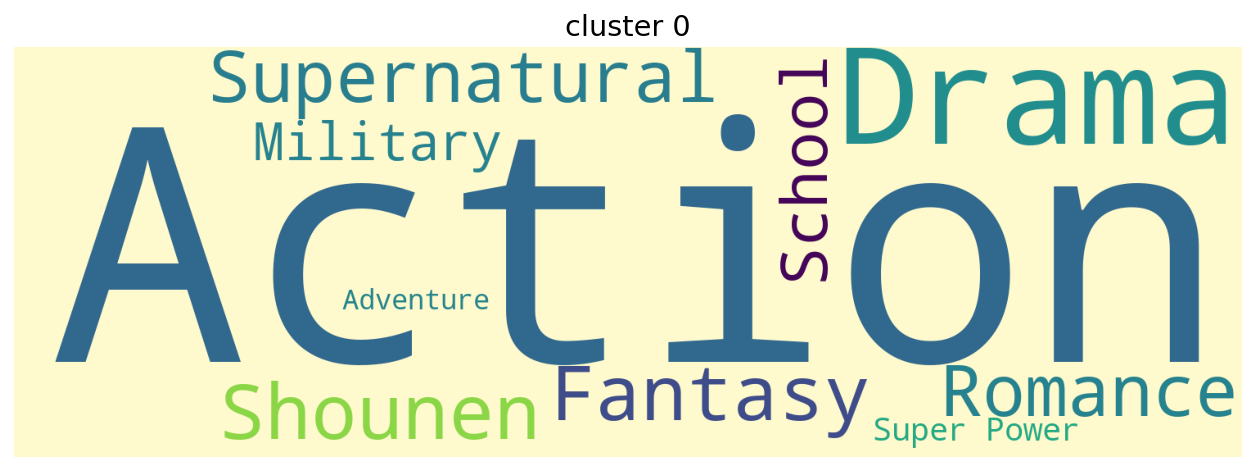

In [38]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [39]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


In [40]:
#cluster 1
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836524
No Game No Life                                        0.818851
Toradora!                                              0.815906
Code Geass: Hangyaku no Lelouch                        0.804124
Steins;Gate                                            0.792342
Shingeki no Kyojin                                     0.783505
Code Geass: Hangyaku no Lelouch R2                     0.777614
Sword Art Online                                       0.768778
Bakemonogatari                                         0.756996
Death Note                                             0.755523
Hataraku Maou-sama!                                    0.730486
Fullmetal Alchemist: Brotherhood                       0.730486
Clannad                                                0.724595
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720177
Chuunibyou demo Koi ga Shitai!                         0.718704
dtype: float64

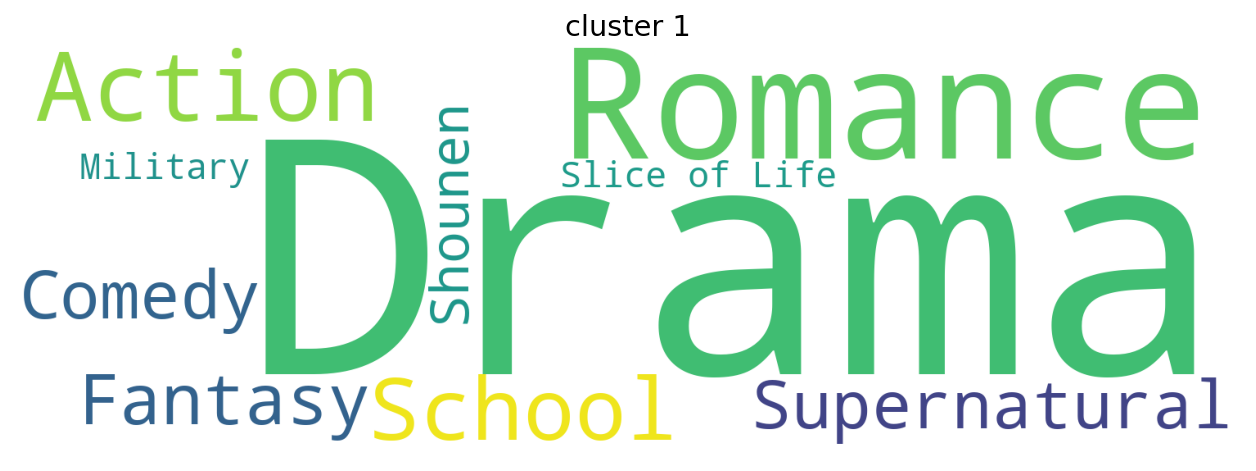

In [41]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [42]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


In [43]:
#cluster 2
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.668454
Code Geass: Hangyaku no Lelouch R2    0.609459
Fullmetal Alchemist                   0.600195
Sen to Chihiro no Kamikakushi         0.583618
Suzumiya Haruhi no Yuuutsu            0.551438
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509995
Mononoke Hime                         0.499756
Toradora!                             0.489030
Elfen Lied                            0.484154
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477328
dtype: float64

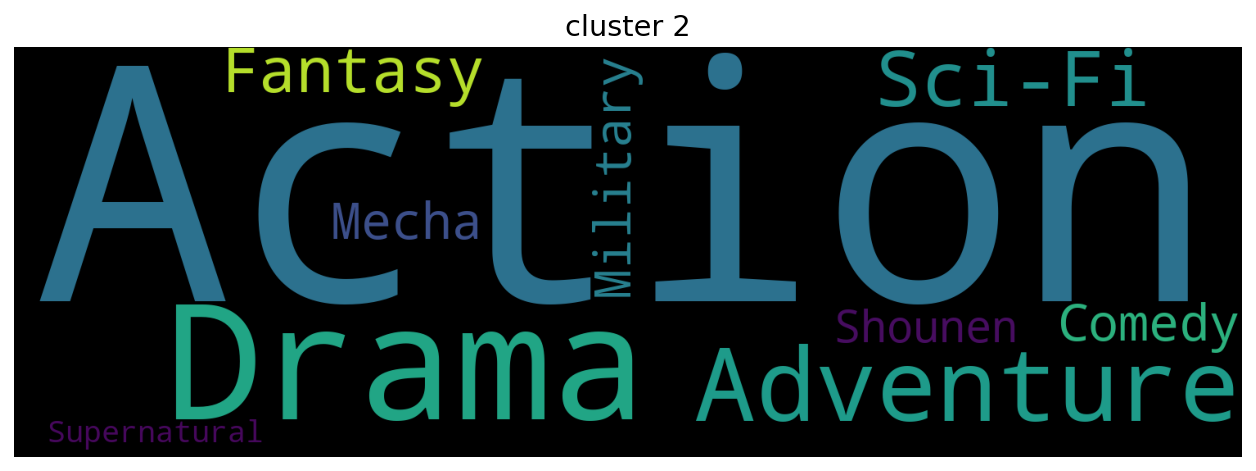

In [44]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [45]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


In [46]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.726753
No Game No Life                                             0.644598
Sword Art Online                                            0.613602
Angel Beats!                                                0.598255
Death Note                                                  0.591032
Steins;Gate                                                 0.551610
Fullmetal Alchemist: Brotherhood                            0.539874
Toradora!                                                   0.517605
Mirai Nikki (TV)                                            0.513993
Code Geass: Hangyaku no Lelouch                             0.506169
Code Geass: Hangyaku no Lelouch R2                          0.478182
Noragami                                                    0.464941
One Punch Man                                               0.464039
Tokyo Ghoul                                                 0.462534
Ano Hi Mita Hana no Namae wo 

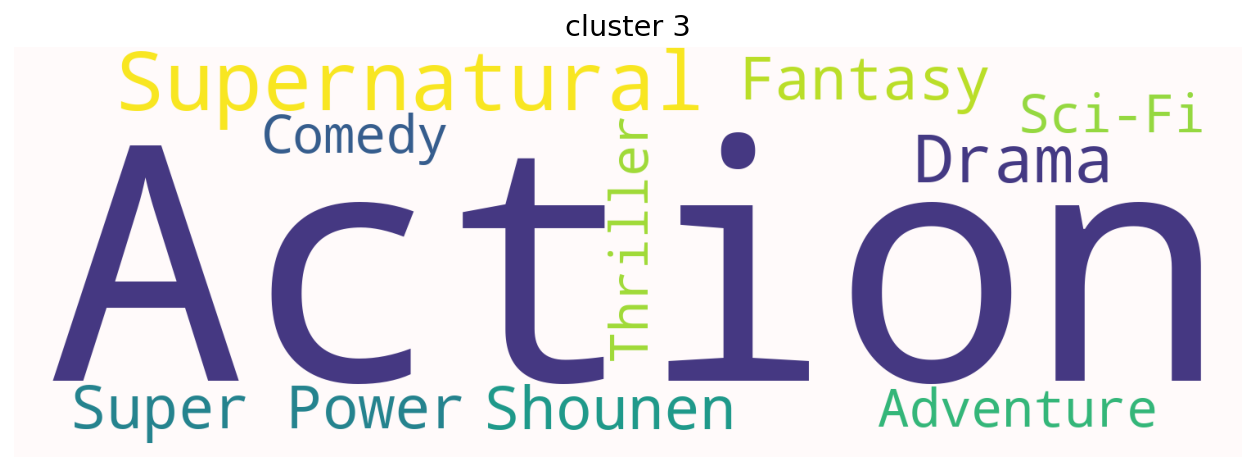

In [49]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [50]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2
